# AI Project 5
## Arman Rostami

In this project, a Neural Network model is implemented. Also methods to verify the model and to solve overfitting problem are discussed and implemented.

## Initializations

### Headers

In [1]:
import math
import random
import functools
import numpy as np
import matplotlib.pyplot as plt

### Defines

In [2]:
PLOT_SIZE = 7

### Utilities

In [3]:
def alphabetize(x,y):
    if x.get_name()>y.get_name():
        return 1
    return -1

def abs_mean(values):
    """Compute the mean of the absolute values a set of numbers.
    For computing the stopping condition for training neural nets"""
    return np.mean(np.abs(values))

### Datas

In [4]:
#
# Training and Test Data used in neural_net_tester.py
#
import pandas as pd

"""
1++
0-+
 01
"""
or_data = ((0,0,0),
           (0,1,1),
           (1,0,1),
           (1,1,1),
           (0.25,0,0),
           (0,0.25,0))

or_test_data = ((0.1,0.1,0),
                (0.1,0.9,1),
                (0.9,0.1,1),
                (0.9,0.9,1))
"""
1-+
0--
 01
"""
and_data = ((0,0,0),
            (0,1,0),
            (1,0,0),
            (1,1,1),
            (0.75,1.0,1),
            (1.0,0.75,1))

and_test_data = ((0.1,0.1,0),
                 (0.1,0.9,0),
                 (0.9,0.1,0),
                 (0.9,0.9,1))

"""
1-+
0+-
 01
"""
equal_data = ((0,0,1),
              (0,1,0),
              (1,0,0),
              (1,1,1))

equal_test_data = ((0.1,0.1,1),
                   (0.1,0.9,0),
                   (0.9,0.1,0),
                   (0.9,0.9,1))

"""
1+-
0-+
 01
"""
neq_data = ((0,0,0),
            (0,1,1),
            (1,0,1),
            (1,1,0))

neq_test_data = ((0.1,0.1,0),
                 (0.1,0.9,1),
                 (0.9,0.1,1),
                 (0.9,0.9,0))


"""
3-++-
2-++-
1-++-
0-++-
 0123
"""
vert_band_data = ((0,0,0),
                  (0,1,0),
                  (0,2,0),
                  (0,3,0),
                  (1,0,1),
                  (1,1,1),
                  (1,2,1),
                  (1,3,1),
                  (2,0,1),
                  (2,1,1),
                  (2,2,1),
                  (2,3,1),
                  (3,0,0),
                  (3,1,0),
                  (3,2,0),
                  (3,3,0))

vert_band_test_data = ((0,    1, 0),
                        (0,    2, 0),
                        (0,  1.5, 0),

                        (1.5,  2, 1),
                        (1.5,  5, 1),
                        (1.5,  1, 1),

                        (3,    1, 0),
                        (3,  1.5, 0),
                        (3,    2, 0),

                        (1,  1.5, 1),
                        (1, -1.5, 1),
                        (2,  1.5, 1),
                        (2, -1.5, 1),

                        (4,  0,   0),
                        (4,  4,   0),
                        (-1, 0,   0),
                        (-1, 4,   0))

"""
3----
2++++
1++++
0----
 0123
"""
horiz_band_data = ((0,0,0),
                   (0,1,1),
                   (0,2,1),
                   (0,3,0),
                   (1,0,0),
                   (1,1,1),
                   (1,2,1),
                   (1,3,0),
                   (2,0,0),
                   (2,1,1),
                   (2,2,1),
                   (2,3,0),
                   (3,0,0),
                   (3,1,1),
                   (3,2,1),
                   (3,3,0))

horiz_band_test_data = ((1, 1.5, 1),
                        (2, 1.5, 1),
                        (3, 1.5, 1),
                        (0, 1.5, 1),
                        (4,   0, 0),
                        (4,   4, 0),
                        (-1,  0, 0),
                        (-1,  4, 0))

"""
4--- +
3-- +
2- + -
1 + --
0+ ---
 01234
"""
diag_band_data = ((0,0,1),
                  (1,1,1),
                  (2,2,1),
                  (3,3,1),
                  (4,4,1),
                  (0,4,0),
                  (4,0,0),
                  (0,3,0),
                  (3,0,0),
                  (0,2,0),
                  (2,0,0),
                  (1,4,0),
                  (4,1,0),
                  (1,3,0),
                  (3,1,0),
                  (2,4,0),
                  (4,2,0),
                  )

diag_band_test_data = ((-1,-1,1),
                       (5,  5,1),
                       (-2,-2,1),
                       (6,  6,1),
                       (3.5,3.5,1),
                       (1.5,1.5,1),
                       (4,  0,0),
                       (0,  4,0))

"""
4+++ -
3++ -
2+ - +
1 - ++
0- +++
 01234
"""
idiag_band_data = ((0,0,0),
                   (1,1,0),
                   (2,2,0),
                   (3,3,0),
                   (4,4,0),
                   (0,4,1),
                   (4,0,1),
                   (0,3,1),
                   (3,0,1),
                   (0,2,1),
                   (2,0,1),
                   (1,4,1),
                   (4,1,1),
                   (1,3,1),
                   (3,1,1),
                   (2,4,1),
                   (4,2,1),
                   )

idiag_band_test_data = ((-1,-1,0),
                        (5,  5,0),
                        (-2,-2,0),
                        (6,  6,0),
                        (3.5,3.5,0),
                        (1.5,1.5,0),
                        (4,  0,1),
                        (0,  4,1))


"""
4-----
3-   -
2- + -
1-   -
0-----
 01234
"""
moat_data = ((0,0,0),
             (1,0,0),
             (2,0,0),
             (3,0,0),
             (4,0,0),

             (1,1,0),
             (4,1,0),

             (1,2,0),
             (3,3,1),
             (4,2,0),

             (1,4,0),
             (4,4,0),

             (0,4,0),
             (1,4,0),
             (2,4,0),
             (3,4,0),
             (4,4,0),
             )

moat_test_data = moat_data

"""
4+-
3+-
2+-
1+----
0-++++
 01234
"""
letter_l_data = ((0,0,0),
                 (1,0,1),
                 (2,0,1),
                 (3,0,1),
                 (4,0,1),

                 (1,1,0),
                 (2,1,0),
                 (3,1,0),
                 (4,1,0),

                 (0,2,1),
                 (1,2,0),

                 (0,3,1),
                 (1,3,0),

                 (0,4,1),
                 (1,4,0),
                 )

letter_l_test_data = letter_l_data

def load_csv(filename):
    df = pd.read_csv(filename)
    data = []
    for _, row in df.iterrows():
        row = row.tolist()
        data.append(row)
    return data

two_moons_data = load_csv('Codes/two-moons/train.csv')
two_moons_test_data = load_csv('Codes/two-moons/test.csv')


simple_data_sets = [("OR", or_data, or_test_data),
                    ("AND", and_data, and_test_data)
                    ]

harder_data_sets = [("EQUAL", equal_data, equal_test_data),
                    ("NOT_EQUAL", neq_data, neq_test_data),
                    ("horizontal-bands", horiz_band_data, horiz_band_test_data),
                    ("vertical-bands", vert_band_data, vert_band_test_data),
                    ("diagonal-band", diag_band_data, diag_band_test_data),
                    ("inverse-diagonal-band", idiag_band_data,
                     idiag_band_test_data)
                    ]

challenging_data_sets = [("moat", moat_data, moat_test_data),
                         ("letter-l", letter_l_data, letter_l_test_data),
                         ]

two_moons_data_set = [("two-moons", two_moons_data, two_moons_test_data)]

all_data_sets = simple_data_sets + harder_data_sets + challenging_data_sets + \
                two_moons_data_set


### Neural Network API

In [5]:
# Neural Net
# - In this file we have an incomplete skeleton of
# a neural network implementation.  Follow the instructions in the
# problem description and complete the NotImplemented methods below.
#
import math
import random
import functools
import numpy as np

class ValuedElement(object):
    """
    This is an abstract class that all Network elements inherit from
    """
    def __init__(self,name,val):
        self.my_name = name
        self.my_value = val

    def set_value(self,val):
        self.my_value = val

    def get_value(self):
        return self.my_value

    def get_name(self):
        return self.my_name

    def __repr__(self):
        return "%s(%1.2f)" %(self.my_name, self.my_value)

class DifferentiableElement(object):
    """
    This is an abstract interface class implemented by all Network
    parts that require some differentiable element.
    """
    def output(self):
        raise NotImplementedError("This is an abstract method")

    def dOutdX(self, elem):
        raise NotImplementedError("This is an abstract method")

    def clear_cache(self):
        """clears any precalculated cached value"""
        pass

class Input(ValuedElement,DifferentiableElement):
    """
    Representation of an Input into the network.
    These may represent variable inputs as well as fixed inputs
    (Thresholds) that are always set to -1.
    """
    def __init__(self,name,val):
        ValuedElement.__init__(self,name,val)
        DifferentiableElement.__init__(self)

    def output(self):
        """
        Returns the output of this Input node.

        returns: number (float or int)
        """
        raise NotImplementedError("Implement me!")

    def dOutdX(self, elem):
        """
        Returns the derivative of this Input node with respect to 
        elem.

        elem: an instance of Weight

        returns: number (float or int)
        """
        raise NotImplementedError("Implement me!")

class Weight(ValuedElement):
    """
    Representation of an weight into a Neural Unit.
    """
    def __init__(self,name,val):
        ValuedElement.__init__(self,name,val)
        self.next_value = None

    def set_next_value(self,val):
        self.next_value = val

    def update(self):
        self.my_value = self.next_value


class Neuron(DifferentiableElement):
    """
    Representation of a single sigmoid Neural Unit.
    """
    def __init__(self, name, inputs, input_weights, use_cache=True):
        assert len(inputs)==len(input_weights)
        for i in range(len(inputs)):
            assert isinstance(inputs[i],(Neuron,Input))
            assert isinstance(input_weights[i],Weight)
        DifferentiableElement.__init__(self)
        self.my_name = name
        self.my_inputs = inputs # list of Neuron or Input instances
        self.my_weights = input_weights # list of Weight instances
        self.use_cache = use_cache
        self.clear_cache()
        self.my_descendant_weights = None
        self.my_direct_weights = None

    def get_descendant_weights(self):
        """
        Returns a mapping of the names of direct weights into this neuron,
        to all descendant weights. For example if neurons [n1, n2] were connected
        to n5 via the weights [w1,w2], neurons [n3,n4] were connected to n6
        via the weights [w3,w4] and neurons [n5,n6] were connected to n7 via
        weights [w5,w6] then n7.get_descendant_weights() would return
        {'w5': ['w1','w2'], 'w6': ['w3','w4']}
        """
        if self.my_descendant_weights is None:
            self.my_descendant_weights = {}
            inputs = self.get_inputs()
            weights = self.get_weights()
            for i in range(len(weights)):
                weight = weights[i]
                weight_name = weight.get_name()
                self.my_descendant_weights[weight_name] = set()
                input = inputs[i]
                if not isinstance(input, Input):
                    descendants = input.get_descendant_weights()
                    for name, s in descendants.items():
                        st = self.my_descendant_weights[weight_name]
                        st = st.union(s)
                        st.add(name)
                        self.my_descendant_weights[weight_name] = st

        return self.my_descendant_weights

    def isa_descendant_weight_of(self, target, weight):
        """
        Checks if [target] is a indirect input weight into this Neuron
        via the direct input weight [weight].
        """
        weights = self.get_descendant_weights()
        if weight.get_name() in weights:
            return target.get_name() in weights[weight.get_name()]
        else:
            raise Exception("weight %s is not connect to this node: %s"
                            %(weight, self))

    def has_weight(self, weight):
        """
        Checks if [weight] is a direct input weight into this Neuron.
        """
        return weight.get_name() in self.get_descendant_weights()

    def get_weight_nodes(self):
        return self.my_weights

    def clear_cache(self):
        self.my_output = None
        self.my_doutdx = {}

    def output(self):
        # Implement compute_output instead!!
        if self.use_cache:
            # caching optimization, saves previously computed output.
            if self.my_output is None:
                self.my_output = self.compute_output()
            return self.my_output
        return self.compute_output()

    def compute_output(self):
        """
        Returns the output of this Neuron node, using a sigmoid as
        the threshold function.

        returns: number (float or int)
        """
        raise NotImplementedError("Implement me!")

    def dOutdX(self, elem):
        # Implement compute_doutdx instead!!
        if self.use_cache:
            # caching optimization, saves previously computed dOutdx.
            if elem not in self.my_doutdx:
                self.my_doutdx[elem] = self.compute_doutdx(elem)
            return self.my_doutdx[elem]
        return self.compute_doutdx(elem)

    def compute_doutdx(self, elem):
        """
        Returns the derivative of this Neuron node, with respect to weight
        elem, calling output() and/or dOutdX() recursively over the inputs.

        elem: an instance of Weight

        returns: number (float/int)
        """
        raise NotImplementedError("Implement me!")

    def get_weights(self):
        return self.my_weights

    def get_inputs(self):
        return self.my_inputs

    def get_name(self):
        return self.my_name

    def __repr__(self):
        return "Neuron(%s)" %(self.my_name)

class PerformanceElem(DifferentiableElement):
    """
    Representation of a performance computing output node.
    This element contains methods for setting the
    desired output (d) and also computing the final
    performance P of the network.

    This implementation assumes a single output.
    """
    def __init__(self,input,desired_value):
        assert isinstance(input,(Input,Neuron))
        DifferentiableElement.__init__(self)
        self.my_input = input
        self.my_desired_val = desired_value

    def output(self):
        """
        Returns the output of this PerformanceElem node.

        returns: number (float/int)
        """
        raise NotImplementedError("Implement me!")

    def dOutdX(self, elem):
        """
        Returns the derivative of this PerformanceElem node with respect
        to some weight, given by elem.

        elem: an instance of Weight

        returns: number (int/float)
        """
        raise NotImplementedError("Implement me!")

    def set_desired(self,new_desired):
        self.my_desired_val = new_desired

    def get_input(self):
        return self.my_input


class Network(object):
    def __init__(self,performance_node,neurons):
        self.inputs =  []
        self.weights = []
        self.performance = performance_node
        self.output = performance_node.get_input()
        self.neurons = neurons[:]
        self.neurons.sort(key=functools.cmp_to_key(alphabetize))
        for neuron in self.neurons:
            self.weights.extend(neuron.get_weights())
            for i in neuron.get_inputs():
                if isinstance(i,Input) and not ('i0' in i.get_name()) and not i in self.inputs:
                    self.inputs.append(i)
        self.weights.reverse()
        self.weights = []
        for n in self.neurons:
            self.weights += n.get_weight_nodes()

    @classmethod
    def from_layers(self,performance_node,layers):
        neurons = []
        for layer in layers:
            if layer.get_name() != 'l0':
                neurons.extend(layer.get_elements())
        return Network(performance_node, neurons)

    def clear_cache(self):
        for n in self.neurons:
            n.clear_cache()

def seed_random():
    """Seed the random number generator so that random
    numbers are deterministically 'random'"""
    random.seed(0)
    np.random.seed(0)

def random_weight():
    """Generate a deterministic random weight"""
    # We found that random.randrange(-1,2) to work well emperically 
    # even though it produces randomly 3 integer values -1, 0, and 1.
    return random.randrange(-1, 2)

    # Uncomment the following if you want to try a uniform distribuiton 
    # of random numbers compare and see what the difference is.
    # return random.uniform(-1, 1)

    # When training larger networks, initialization with small, random
    # values centered around 0 is also common, like the line below:
    # return np.random.normal(0,0.1)

def make_neural_net_basic():
    """
    Constructs a 2-input, 1-output Network with a single neuron.
    This network is used to test your network implementation
    and a guide for constructing more complex networks.

    Naming convention for each of the elements:

    Input: 'i'+ input_number
    Example: 'i1', 'i2', etc.
    Conventions: Start numbering at 1.
                 For the -1 inputs, use 'i0' for everything

    Weight: 'w' + from_identifier + to_identifier
    Examples: 'w1A' for weight from Input i1 to Neuron A
              'wAB' for weight from Neuron A to Neuron B

    Neuron: alphabet_letter
    Convention: Order names by distance to the inputs.
                If equal distant, then order them left to right.
    Example:  'A' is the neuron closest to the inputs.

    All names should be unique.
    You must follow these conventions in order to pass all the tests.
    """
    i0 = Input('i0', -1.0) # this input is immutable
    i1 = Input('i1', 0.0)
    i2 = Input('i2', 0.0)

    w1A = Weight('w1A', 1)
    w2A = Weight('w2A', 1)
    wA  = Weight('wA', 1)

    # Inputs must be in the same order as their associated weights
    A = Neuron('A', [i1,i2,i0], [w1A,w2A,wA])
    P = PerformanceElem(A, 0.0)

    # Package all the components into a network
    # First list the PerformanceElem P, Then list all neurons afterwards
    net = Network(P,[A])
    return net

def make_neural_net_two_layer():
    """
    Create a 2-input, 1-output Network with three neurons.
    There should be two neurons at the first level, each receiving both inputs
    Both of the first level neurons should feed into the second layer neuron.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    raise NotImplementedError("Implement me!")


def make_neural_net_challenging():
    """
    Design a network that can in-theory solve all 3 problems described in
    the lab instructions.  Your final network should contain
    at most 5 neuron units.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    raise NotImplementedError("Implement me!")


def make_neural_net_two_moons():
    """
    Create an overparametrized network with 40 neurons in the first layer
    and a single neuron in the last. This network is more than enough to solve
    the two-moons dataset, and as a result will over-fit the data if trained
    excessively.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    raise NotImplementedError("Implement me!")


def train(network,
          data,      # training data
          rate=1.0,  # learning rate
          target_abs_mean_performance=0.0001,
          max_iterations=10000,
          verbose=False):
    """Run back-propagation training algorithm on a given network.
    with training [data].   The training runs for [max_iterations]
    or until [target_abs_mean_performance] is reached.
    """

    iteration = 0
    while iteration < max_iterations:
        fully_trained = False
        performances = []  # store performance on each data point
        for datum in data:
            # set network inputs
            for i in range(len(network.inputs)):
                network.inputs[i].set_value(datum[i])

            # set network desired output
            network.performance.set_desired(datum[-1])

            # clear cached calculations
            network.clear_cache()

            # compute all the weight updates
            for w in network.weights:
                w.set_next_value(w.get_value() +
                                 rate * network.performance.dOutdX(w))

            # set the new weights
            for w in network.weights:
                w.update()

            # save the performance value
            performances.append(network.performance.output())

            # clear cached calculations
            network.clear_cache()

        # compute the mean performance value
        abs_mean_performance = abs_mean(performances)

        if abs_mean_performance < target_abs_mean_performance:
            if verbose:
                print("iter %d: training complete.\n"\
                      "mean-abs-performance threshold %s reached (%1.6f)"\
                      %(iteration,
                        target_abs_mean_performance,
                        abs_mean_performance))
            break

        iteration += 1

        if iteration % 10 == 0 and verbose:
            print("iter %d: mean-abs-performance = %1.6f"\
                  %(iteration,
                    abs_mean_performance))

    print('weights:', network.weights)


def test(network, data, verbose=False):
    """Test the neural net on some given data."""
    correct = 0
    for datum in data:

        for i in range(len(network.inputs)):
            network.inputs[i].set_value(datum[i])

        # clear cached calculations
        network.clear_cache()

        result = network.output.output()
        prediction = round(result)

        network.clear_cache()

        if prediction == datum[-1]:
            correct+=1
            if verbose:
                print("test(%s) returned: %s => %s [%s]" %(str(datum),
                                                           str(result),
                                                           datum[-1],
                                                           "correct"))
        else:
            if verbose:
                print("test(%s) returned: %s => %s [%s]" %(str(datum),
                                                           str(result),
                                                           datum[-1],
                                                           "wrong"))

    return float(correct)/len(data)

### Test Function

In [6]:
def main(neural_net_func, data_sets, rate=1.0, max_iterations=10000):
    verbose = False
    for name, training_data, test_data in data_sets:
        print("-"*40)
        print("Training on %s data" %(name))
        nn = neural_net_func()
        train(nn, training_data, rate=rate, max_iterations=max_iterations,
              verbose=verbose)
        print("Trained weights:")
        for w in nn.weights:
            print("Weight '%s': %f"%(w.get_name(),w.get_value()))
        print("Testing on %s test-data" %(name))
        result = test(nn, test_data, verbose=verbose)
        print("Accuracy: %f"%(result))

## Implement Neural Network

### outputs

output functions show result of each unit in network.

#### Input class outputs

Input nodes represent values of inputs and output given inputs.

In [7]:
def output(self):
    """
    Returns the output of this Input node.

    returns: number (float or int)
    """
    return self.get_value()

In [8]:
Input.output = output

#### Neuron class outputs

Neuron nodes are the activation units and use activation functions such as sigmoid function to output the value. At the beginning, activation of node is calculated as z with forward propagation and given to sigmoid function to return as output.

Sigmoid Function:
\begin{equation}
g(z) = \frac{1}{1 + \exp(-z)}
\end{equation}

In [9]:
def compute_output(self):
    """
    Returns the output of this Neuron node, using a sigmoid as
    the threshold function.

    returns: number (float or int)
    """
    inputs = self.get_inputs()
    weights = self.get_weights()

    z = 0
    for i in range(len(inputs)):
        z += weights[i].get_value() * inputs[i].output()

    z = 1.0 / (1 + math.exp(-z))

    return z

In [10]:
Neuron.compute_output = compute_output

#### PerformanceElem class outputs

Performance nodes represent performance and can be calculated using mean squared error. Minus sign is because we are using performance which is in opposite of error.

\begin{equation}
Performance = -\frac{1}{2} \times (desired\_value - result\_value)^2
\end{equation}

In [11]:
def output(self):
    """
    Returns the output of this PerformanceElem node.

    returns: number (float/int)
    """
    return (-0.5 * (self.my_desired_val - self.my_input.output()) ** 2)

In [12]:
PerformanceElem.output = output

### Partial Derivatives

Partial derivatives of nodes are calculated to use in finding weight algorithms such as Gradient Descent.

#### Input class partial derivative

input nodes represent inputs as constant values therefore their partial deritives equal to zero.

In [13]:
def dOutdX(self, elem):
    """
    Returns the derivative of this Input node with respect to 
    elem.

    elem: an instance of Weight

    returns: number (float or int)
    """
    return 0

In [14]:
Input.dOutdX = dOutdX

#### Neuron class partial derivative

Chain rule is used to calculate partial derivate for neuron nodes:

\begin{equation}
\frac{\partial g(z)}{\partial w_i} = \frac{\partial g(z)}{\partial z} \times \frac{\partial z}{\partial w_i}
\end{equation}

For sigmoid function:

\begin{equation}
\frac{\partial g(z)}{\partial z} = g(z) \times (1 - g(z))
\end{equation}

For input weights we can calculate $\frac{\partial z}{\partial w_i}$ as follows:

\begin{equation}
\frac{\partial z}{\partial w_i} = input_i
\end{equation}

And for not input weight we can calculate $\frac{\partial z}{\partial w_i}$ using descendant weights $w_j$ s.

\begin{equation}
\frac{\partial z}{\partial w_i} = \sum\limits_{j}^{} w_j \times \frac{\partial input_j}{\partial w_i}
\end{equation}

In [15]:
def compute_doutdx(self, elem):
    """
    Returns the derivative of this Neuron node, with respect to weight
    elem, calling output() and/or dOutdX() recursively over the inputs.

    elem: an instance of Weight

    returns: number (float/int)
    """
    output = self.output()
    dGdZ = output * (1 - output)

    if self.has_weight(elem):            
        index = self.my_weights.index(elem)
        return dGdZ * self.get_inputs()[index].output()
    else:
        dZdW = 0
        for i in range(len(self.get_weights())):
            current_weight = self.my_weights[i]
            if self.isa_descendant_weight_of(elem, current_weight):
                dZdW += current_weight.get_value() * self.get_inputs()[i].dOutdX(elem)
        return dGdZ * dZdW

In [16]:
Neuron.compute_doutdx = compute_doutdx

#### PerformanceElem class partial derivative

We can calculate $\frac{\partial P}{\partial w_i}$ as follows:

\begin{equation}
\frac{\partial P}{\partial w_i} = (desired\_value - result\_value) \times \frac{\partial output}{\partial w_i}
\end{equation}

In [17]:
def dOutdX(self, elem):
    """
    Returns the derivative of this PerformanceElem node with respect
    to some weight, given by elem.

    elem: an instance of Weight

    returns: number (int/float)
    """
    return (self.my_desired_val - self.my_input.output()) * self.my_input.dOutdX(elem)

In [18]:
PerformanceElem.dOutdX = dOutdX

### Results

We test current results with "simple_data_sets" dataset containing AND and OR datasets.

In [19]:
main(make_neural_net_basic, simple_data_sets)

----------------------------------------
Training on OR data
weights: [w1A(10.78), w2A(10.78), wA(6.69)]
Trained weights:
Weight 'w1A': 10.777776
Weight 'w2A': 10.778222
Weight 'wA': 6.686619
Testing on OR test-data
Accuracy: 1.000000
----------------------------------------
Training on AND data
weights: [w1A(10.50), w2A(10.50), wA(14.37)]
Trained weights:
Weight 'w1A': 10.499844
Weight 'w2A': 10.499561
Weight 'wA': 14.366979
Testing on AND test-data
Accuracy: 1.000000


Result was successful and reached 100% accuracy.

## Finite Difference

Finite difference can be used to calculate predictions of partial derivatives and compare result values with predicted values to test correctness of model. Following functions show implementation of finite difference for neural network model:

In [20]:
def calculate_finite_difference(network, w):
    eps = 1e-8
    network.clear_cache()
    previous_f = network.performance.output()
    w.set_value(w.get_value() + eps)
    network.clear_cache()
    eps_f = network.performance.output()
    w.set_value(w.get_value() - eps)
    return (eps_f - previous_f) / eps

In [21]:
def finite_difference(network):
    result = True
    for w in network.weights:
        derivative_output = network.performance.dOutdX(w)
        derivative_finite = calculate_finite_difference(network, w)
        if abs(derivative_output - derivative_finite) > 1e-4:
            result = False
            break
    network.clear_cache()
    return result

### Results

finite_difference is tested on "simple_data_set" dataset. Following changes are necessary to test main function with finite difference.

In [22]:
def main(neural_net_func, data_sets, rate=1.0, max_iterations=10000):
    verbose = False
    for name, training_data, test_data in data_sets:
        print("-"*40)
        print("Training on %s data" %(name))
        nn = neural_net_func()
        train(nn, training_data, rate=rate, max_iterations=max_iterations,
              verbose=verbose)
        print("Trained weights:")
        for w in nn.weights:
            print("Weight '%s': %f"%(w.get_name(),w.get_value()))
        print("Testing on %s test-data" %(name))
        result = test(nn, test_data, verbose=verbose)
        print("Accuracy: %f"%(result))
        print("Finite Difference Check:", finite_difference(nn))

In [23]:
main(make_neural_net_basic, simple_data_sets)

----------------------------------------
Training on OR data
weights: [w1A(10.78), w2A(10.78), wA(6.69)]
Trained weights:
Weight 'w1A': 10.777776
Weight 'w2A': 10.778222
Weight 'wA': 6.686619
Testing on OR test-data
Accuracy: 1.000000
Finite Difference Check: True
----------------------------------------
Training on AND data
weights: [w1A(10.50), w2A(10.50), wA(14.37)]
Trained weights:
Weight 'w1A': 10.499844
Weight 'w2A': 10.499561
Weight 'wA': 14.366979
Testing on AND test-data
Accuracy: 1.000000
Finite Difference Check: True


Result was successful and finite_difference function returned True value which means all weights were validated.

## Implementing Two Layer Neural Network

<img src="images/twoLayer.png" width=400/>

Following code shows implementation of two layer neural network shown above using previous implementations.

In [24]:
def make_neural_net_two_layer():
    """
    Create a 2-input, 1-output Network with three neurons.
    There should be two neurons at the first level, each receiving both inputs
    Both of the first level neurons should feed into the second layer neuron.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    seed_random()

    i0 = Input('i0', -1.0)
    i1 = Input('i1', 0.0)
    i2 = Input('i2', 0.0)

    w1A = Weight('w1A', random_weight())
    w2A = Weight('w2A', random_weight())
    wA = Weight('wA', random_weight())


    w1B = Weight('w1B', random_weight())
    w2B = Weight('w2B', random_weight())
    wB = Weight('wB', random_weight())

    wAC = Weight('wAC', random_weight())
    wBC = Weight('wBC', random_weight())
    wC = Weight('wC', random_weight())

    A = Neuron('A', [i1, i2, i0], [w1A, w2A, wA])
    B = Neuron('B', [i1, i2, i0], [w1B, w2B, wB])
    C = Neuron('C', [A, B, i0], [wAC, wBC, wC])

    P = PerformanceElem(C, 0.0)
    net = Network(P, [A, B, C])

    return net

### Results

We test current result with "simple_data_sets" concatinated with "harder_data_sets" on model generated with make_neural_net_two_layer.

In [25]:
main(make_neural_net_two_layer, simple_data_sets + harder_data_sets)

----------------------------------------
Training on OR data
weights: [w1A(-2.90), w2A(-2.88), wA(-1.67), w1B(4.72), w2B(4.75), wB(2.86), wAC(-4.91), wBC(8.00), wC(1.75)]
Trained weights:
Weight 'w1A': -2.904916
Weight 'w2A': -2.879784
Weight 'wA': -1.670792
Weight 'w1B': 4.721640
Weight 'w2B': 4.745236
Weight 'wB': 2.861249
Weight 'wAC': -4.914305
Weight 'wBC': 8.000898
Weight 'wC': 1.754833
Testing on OR test-data
Accuracy: 1.000000
Finite Difference Check: True
----------------------------------------
Training on AND data
weights: [w1A(-3.08), w2A(-3.02), wA(-3.96), w1B(3.75), w2B(3.80), wB(5.00), wAC(-6.43), wBC(7.93), wC(1.24)]
Trained weights:
Weight 'w1A': -3.078848
Weight 'w2A': -3.015028
Weight 'wA': -3.962159
Weight 'w1B': 3.747336
Weight 'w2B': 3.804627
Weight 'wB': 5.004915
Weight 'wAC': -6.430871
Weight 'wBC': 7.933264
Weight 'wC': 1.235360
Testing on AND test-data
Accuracy: 1.000000
Finite Difference Check: True
----------------------------------------
Training on EQUAL d

Result was successful and reached 100% accuracy  on given datasets.

## Plot Decision Boundary

Following function is used to plot a scatter including decision boundary and values of given dataset if dataset is given to function.

In [26]:
def plot_decision_boundary(network, xmin, xmax, ymin, ymax, data_sets = []):
    interval = (xmax - xmin) / 200
    a_points = []
    b_points = []
    for x in np.arange(xmin, xmax, interval):
        for y in np.arange(ymin, ymax, interval):
            network.inputs[0].set_value(x)
            network.inputs[1].set_value(y)
            network.clear_cache()
            result = network.output.output()
            if result > 0.5:
                a_points.append((x, y))
            else:
                b_points.append((x, y))

            network.clear_cache()

    x = list(map(lambda x: x[0], a_points))
    y = list(map(lambda x: x[1], a_points))
    plt.scatter(x, y, color = "#999cca", alpha = 0.1)

    x = list(map(lambda x: x[0], b_points))
    y = list(map(lambda x: x[1], b_points))
    plt.scatter(x, y, color = "#cb6e8f", alpha = 0.1)

    for data in data_sets:
        if data[2] == 1:
            plt.scatter(data[0], data[1], color="#5a4c9c", alpha=1)
        else:
            plt.scatter(data[0], data[1], color="#9d0141", alpha=1)

    plt.title("Decision Boundary")
    plt.show()

### Results

plot_decision_boundary is tested on "two" dataset with model generated by make_neural_net_two_layer. Following changes are necessary to test main function with decision boundary plot.

In [27]:
def main(neural_net_func, data_sets, rate=1.0, max_iterations=10000):
    verbose = False
    for name, training_data, test_data in data_sets:
        print("-"*40)
        print("Training on %s data" %(name))
        nn = neural_net_func()
        train(nn, training_data, rate=rate, max_iterations=max_iterations,
              verbose=verbose)
        print("Trained weights:")
        for w in nn.weights:
            print("Weight '%s': %f"%(w.get_name(),w.get_value()))
        print("Testing on %s test-data" %(name))
        result = test(nn, test_data, verbose=verbose)
        print("Accuracy: %f"%(result))
        print("Finite Difference Check:", finite_difference(nn))
        print("Decision Boundary on Training Data:")
        plot_decision_boundary(nn, -PLOT_SIZE, PLOT_SIZE, -PLOT_SIZE, PLOT_SIZE, training_data)
        print("Decision Boundary on Test Data:")
        plot_decision_boundary(nn, -PLOT_SIZE, PLOT_SIZE, -PLOT_SIZE, PLOT_SIZE, test_data)

----------------------------------------
Training on OR data
weights: [w1A(-2.90), w2A(-2.88), wA(-1.67), w1B(4.72), w2B(4.75), wB(2.86), wAC(-4.91), wBC(8.00), wC(1.75)]
Trained weights:
Weight 'w1A': -2.904916
Weight 'w2A': -2.879784
Weight 'wA': -1.670792
Weight 'w1B': 4.721640
Weight 'w2B': 4.745236
Weight 'wB': 2.861249
Weight 'wAC': -4.914305
Weight 'wBC': 8.000898
Weight 'wC': 1.754833
Testing on OR test-data
Accuracy: 1.000000
Finite Difference Check: True
Decision Boundary on Training Data:


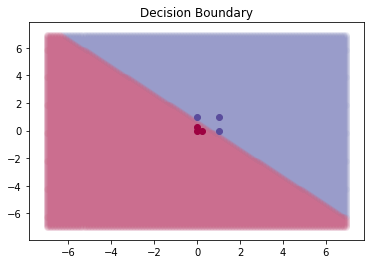

Decision Boundary on Test Data:


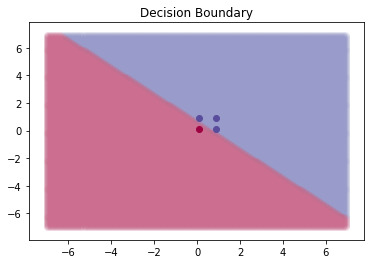

----------------------------------------
Training on AND data
weights: [w1A(-3.08), w2A(-3.02), wA(-3.96), w1B(3.75), w2B(3.80), wB(5.00), wAC(-6.43), wBC(7.93), wC(1.24)]
Trained weights:
Weight 'w1A': -3.078848
Weight 'w2A': -3.015028
Weight 'wA': -3.962159
Weight 'w1B': 3.747336
Weight 'w2B': 3.804627
Weight 'wB': 5.004915
Weight 'wAC': -6.430871
Weight 'wBC': 7.933264
Weight 'wC': 1.235360
Testing on AND test-data
Accuracy: 1.000000
Finite Difference Check: True
Decision Boundary on Training Data:


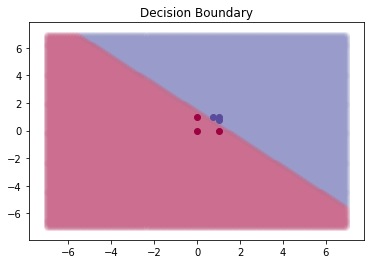

Decision Boundary on Test Data:


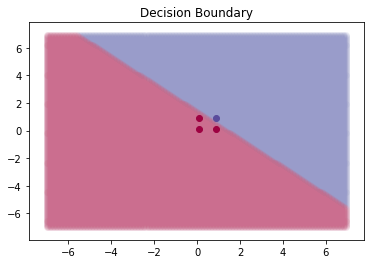

----------------------------------------
Training on EQUAL data
weights: [w1A(-6.71), w2A(-6.54), wA(-2.73), w1B(-4.93), w2B(-4.90), wB(-7.32), wAC(10.32), wBC(-10.19), wC(-4.85)]
Trained weights:
Weight 'w1A': -6.714234
Weight 'w2A': -6.543802
Weight 'wA': -2.729777
Weight 'w1B': -4.933870
Weight 'w2B': -4.901881
Weight 'wB': -7.323522
Weight 'wAC': 10.318571
Weight 'wBC': -10.191227
Weight 'wC': -4.846239
Testing on EQUAL test-data
Accuracy: 1.000000
Finite Difference Check: True
Decision Boundary on Training Data:


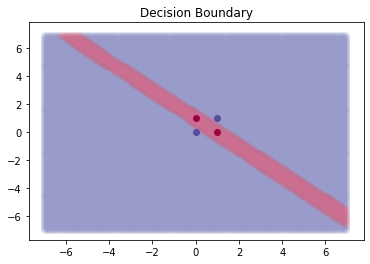

Decision Boundary on Test Data:


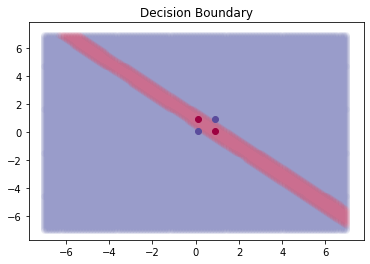

----------------------------------------
Training on NOT_EQUAL data
weights: [w1A(-6.71), w2A(-6.54), wA(-2.73), w1B(-4.93), w2B(-4.90), wB(-7.32), wAC(-10.32), wBC(10.19), wC(4.85)]
Trained weights:
Weight 'w1A': -6.714234
Weight 'w2A': -6.543802
Weight 'wA': -2.729777
Weight 'w1B': -4.933870
Weight 'w2B': -4.901881
Weight 'wB': -7.323522
Weight 'wAC': -10.318571
Weight 'wBC': 10.191227
Weight 'wC': 4.846239
Testing on NOT_EQUAL test-data
Accuracy: 1.000000
Finite Difference Check: True
Decision Boundary on Training Data:


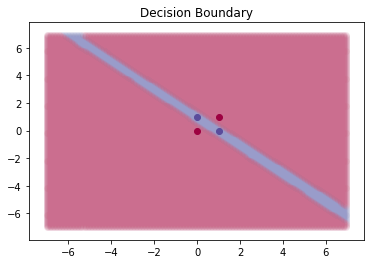

Decision Boundary on Test Data:


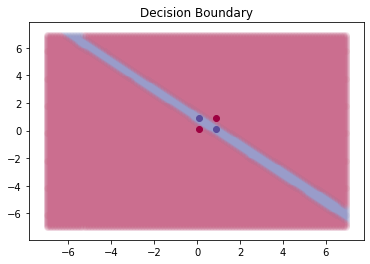

----------------------------------------
Training on horizontal-bands data
weights: [w1A(0.09), w2A(-4.82), wA(-11.74), w1B(-0.23), w2B(7.34), wB(3.60), wAC(9.91), wBC(9.47), wC(14.31)]
Trained weights:
Weight 'w1A': 0.088970
Weight 'w2A': -4.818180
Weight 'wA': -11.736355
Weight 'w1B': -0.230610
Weight 'w2B': 7.342591
Weight 'wB': 3.604769
Weight 'wAC': 9.912564
Weight 'wBC': 9.474189
Weight 'wC': 14.312040
Testing on horizontal-bands test-data
Accuracy: 1.000000
Finite Difference Check: True
Decision Boundary on Training Data:


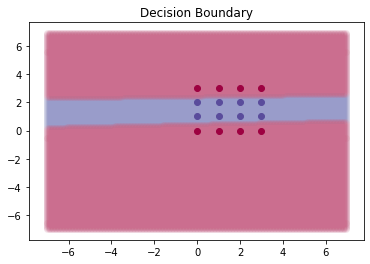

Decision Boundary on Test Data:


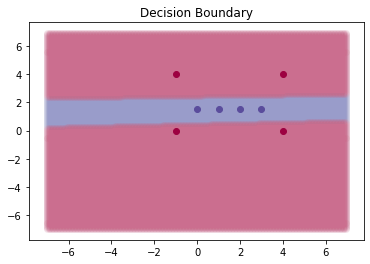

----------------------------------------
Training on vertical-bands data
weights: [w1A(-4.18), w2A(0.07), wA(-10.14), w1B(-6.12), w2B(0.21), wB(-2.91), wAC(10.46), wBC(-10.21), wC(5.04)]
Trained weights:
Weight 'w1A': -4.179059
Weight 'w2A': 0.073090
Weight 'wA': -10.140434
Weight 'w1B': -6.116850
Weight 'w2B': 0.209211
Weight 'wB': -2.907297
Weight 'wAC': 10.460442
Weight 'wBC': -10.214859
Weight 'wC': 5.042128
Testing on vertical-bands test-data
Accuracy: 1.000000
Finite Difference Check: True
Decision Boundary on Training Data:


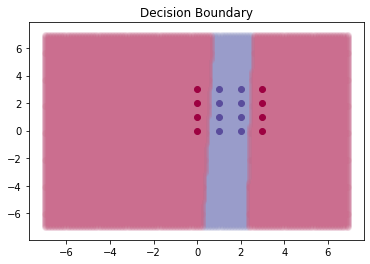

Decision Boundary on Test Data:


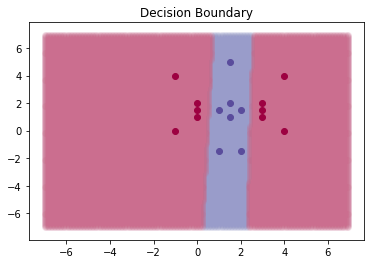

----------------------------------------
Training on diagonal-band data
weights: [w1A(4.34), w2A(-3.91), wA(-3.34), w1B(3.48), w2B(-3.69), wB(3.50), wAC(8.76), wBC(-9.08), wC(4.36)]
Trained weights:
Weight 'w1A': 4.336851
Weight 'w2A': -3.905844
Weight 'wA': -3.336243
Weight 'w1B': 3.484567
Weight 'w2B': -3.687835
Weight 'wB': 3.495438
Weight 'wAC': 8.755707
Weight 'wBC': -9.075091
Weight 'wC': 4.364637
Testing on diagonal-band test-data
Accuracy: 1.000000
Finite Difference Check: True
Decision Boundary on Training Data:


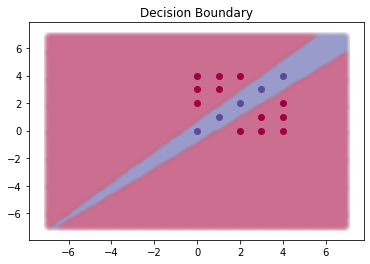

Decision Boundary on Test Data:


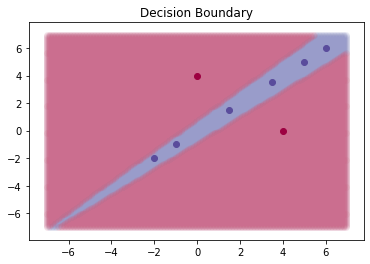

----------------------------------------
Training on inverse-diagonal-band data
weights: [w1A(4.34), w2A(-3.91), wA(-3.34), w1B(3.48), w2B(-3.69), wB(3.50), wAC(-8.76), wBC(9.08), wC(-4.36)]
Trained weights:
Weight 'w1A': 4.336851
Weight 'w2A': -3.905844
Weight 'wA': -3.336243
Weight 'w1B': 3.484567
Weight 'w2B': -3.687835
Weight 'wB': 3.495438
Weight 'wAC': -8.755707
Weight 'wBC': 9.075091
Weight 'wC': -4.364637
Testing on inverse-diagonal-band test-data
Accuracy: 1.000000
Finite Difference Check: True
Decision Boundary on Training Data:


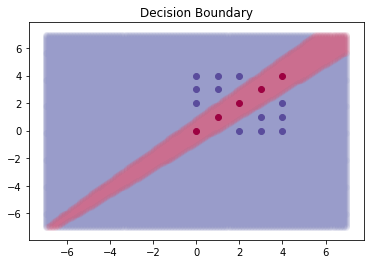

Decision Boundary on Test Data:


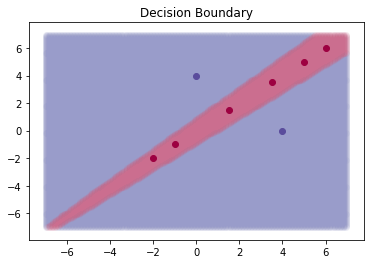

In [28]:
main(make_neural_net_two_layer, simple_data_sets + harder_data_sets)

## Overfitting

Overfitting occurs when our neural network is so closely fitted to the training set that it is difficult to generalize and make predictions for new data. To solve this problem there are method like regularization, using more data, remove some features, etc. In this project L2-norm method is implemented which is a regularization algorithm.

### Implement Two Moon Neural Network

Following shows implementation of two moon network:

In [29]:
def make_neural_net_two_moons():
    """
    Create an overparametrized network with 40 neurons in the first layer
    and a single neuron in the last. This network is more than enough to solve
    the two-moons dataset, and as a result will over-fit the data if trained
    excessively.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    seed_random()

    i0 = Input('i0', -1.0)
    i1 = Input('i1', 0.0)
    i2 = Input('i2', 0.0)
    
    nerun_indexes = ["%02d" % x for x in range(1, 41)]
    
    neurons = []
    wACs = []
    
    for neuron_index in nerun_indexes:
        w1A = Weight("w1A" + neuron_index, random_weight())
        w2A = Weight("w2A" + neuron_index, random_weight())
        wA = Weight("wA" + neuron_index, random_weight())
        neurons.append(Neuron('A' + neuron_index, [i1, i2, i0], [w1A, w2A, wA]))
        wACs.append(Weight('wA' + neuron_index + 'C', random_weight()))
    
    wC = Weight('wC', random_weight())
    C = Neuron('C', neurons + [i0], wACs + [wC])
    
    P = PerformanceElem(C, 0.0)
    net = Network(P, neurons + [C])

    return net

### Analysis Overfitting on Two Moon Network

We analyze two moon network to study effect of overfitting by setting number of iterations to 100, 500, 1000 respectively. Following changes are necessary to test main function with finite difference.

In [30]:
def main(neural_net_func, data_sets, rate=1.0, max_iterations=10000):
    verbose = False
    for name, training_data, test_data in data_sets:
        print("-"*40)
        print("Training on %s data" %(name))
        nn = neural_net_func()
        train(nn, training_data, rate=rate, max_iterations=max_iterations,
              verbose=verbose)
        print("Trained weights:")
        for w in nn.weights:
            print("Weight '%s': %f"%(w.get_name(),w.get_value()))  
        print("Finite Difference Check:", finite_difference(nn))
        print("Decision Boundary on Training Data:")
        plot_decision_boundary(nn, -PLOT_SIZE, PLOT_SIZE, -PLOT_SIZE, PLOT_SIZE, training_data)
        print("Decision Boundary on Test Data:")
        plot_decision_boundary(nn, -PLOT_SIZE, PLOT_SIZE, -PLOT_SIZE, PLOT_SIZE, test_data)
        test_result = test(nn, test_data, verbose=verbose)
        print("Test Data Accuracy: %f"%(test_result))
        train_result = test(nn, training_data, verbose=verbose)
        print("Train Data Accuracy: %f"%(train_result))

#### Max Iteration = 100:

----------------------------------------
Training on two-moons data
weights: [w1A01(-0.03), w2A01(-0.25), wA01(-0.25), w1A02(0.78), w2A02(-0.36), wA02(0.58), w1A03(-0.56), w2A03(0.64), wA03(1.20), w1A04(0.85), w2A04(-0.79), wA04(0.56), w1A05(-0.99), w2A05(0.49), wA05(0.47), w1A06(1.22), w2A06(0.92), wA06(-0.65), w1A07(-1.29), w2A07(0.33), wA07(-0.44), w1A08(-0.56), w2A08(0.64), wA08(1.20), w1A09(0.77), w2A09(-0.97), wA09(0.58), w1A10(1.23), w2A10(-1.45), wA10(1.42), w1A11(-0.68), w2A11(1.59), wA11(0.67), w1A12(0.75), w2A12(-1.72), wA12(-0.06), w1A13(0.24), w2A13(0.31), wA13(1.40), w1A14(-0.77), w2A14(1.18), wA14(0.50), w1A15(-0.99), w2A15(0.49), wA15(0.47), w1A16(-3.95), w2A16(-1.57), wA16(2.19), w1A17(-1.29), w2A17(-1.12), wA17(1.28), w1A18(-2.41), w2A18(-2.17), wA18(-0.98), w1A19(0.97), w2A19(-1.81), wA19(0.81), w1A20(0.80), w2A20(0.61), wA20(-0.63), w1A21(0.80), w2A21(0.61), wA21(-0.63), w1A22(0.93), w2A22(0.97), wA22(0.78), w1A23(-0.77), w2A23(1.18), wA23(0.50), w1A24(0.85), w2A24(

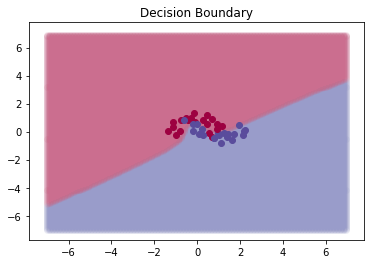

Decision Boundary on Test Data:


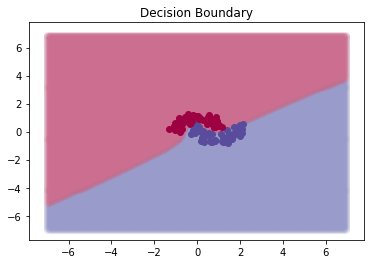

Test Data Accuracy: 0.980000
Train Data Accuracy: 0.926829


In [31]:
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=100)

#### Max Iteration = 500:

----------------------------------------
Training on two-moons data
weights: [w1A01(0.27), w2A01(-0.80), wA01(0.33), w1A02(1.08), w2A02(-0.91), wA02(0.71), w1A03(-0.67), w2A03(0.89), wA03(1.78), w1A04(1.10), w2A04(-1.12), wA04(0.60), w1A05(-0.85), w2A05(0.12), wA05(1.24), w1A06(1.37), w2A06(0.21), wA06(-0.14), w1A07(-1.02), w2A07(-0.30), wA07(0.63), w1A08(-0.67), w2A08(0.89), wA08(1.78), w1A09(1.26), w2A09(-1.44), wA09(0.59), w1A10(1.80), w2A10(-1.72), wA10(1.54), w1A11(-0.77), w2A11(1.84), wA11(1.85), w1A12(1.17), w2A12(-1.92), wA12(-0.11), w1A13(0.57), w2A13(-0.06), wA13(1.54), w1A14(-0.79), w2A14(1.20), wA14(1.50), w1A15(-0.85), w2A15(0.12), wA15(1.24), w1A16(-8.08), w2A16(-3.24), wA16(3.75), w1A17(-1.70), w2A17(-1.45), wA17(1.63), w1A18(-5.47), w2A18(-5.77), wA18(-3.12), w1A19(1.54), w2A19(-1.90), wA19(0.91), w1A20(1.04), w2A20(-0.34), wA20(-0.01), w1A21(1.04), w2A21(-0.34), wA21(-0.01), w1A22(0.95), w2A22(0.90), wA22(1.31), w1A23(-0.79), w2A23(1.20), wA23(1.50), w1A24(1.10), w2A24

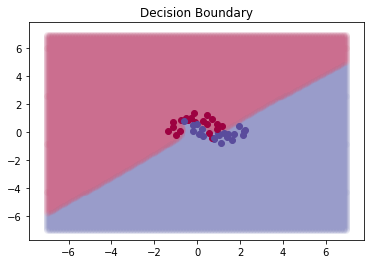

Decision Boundary on Test Data:


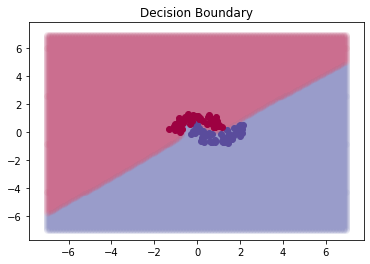

Test Data Accuracy: 0.940000
Train Data Accuracy: 0.951220


In [32]:
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=500)

#### Max Iteration = 1000:

----------------------------------------
Training on two-moons data
weights: [w1A01(0.27), w2A01(-0.80), wA01(0.33), w1A02(1.08), w2A02(-0.91), wA02(0.71), w1A03(-0.67), w2A03(0.89), wA03(1.78), w1A04(1.10), w2A04(-1.12), wA04(0.60), w1A05(-0.85), w2A05(0.12), wA05(1.24), w1A06(1.37), w2A06(0.21), wA06(-0.14), w1A07(-1.02), w2A07(-0.30), wA07(0.63), w1A08(-0.67), w2A08(0.89), wA08(1.78), w1A09(1.26), w2A09(-1.44), wA09(0.59), w1A10(1.80), w2A10(-1.72), wA10(1.54), w1A11(-0.77), w2A11(1.84), wA11(1.85), w1A12(1.17), w2A12(-1.92), wA12(-0.11), w1A13(0.57), w2A13(-0.06), wA13(1.54), w1A14(-0.79), w2A14(1.20), wA14(1.50), w1A15(-0.85), w2A15(0.12), wA15(1.24), w1A16(-8.08), w2A16(-3.24), wA16(3.75), w1A17(-1.70), w2A17(-1.45), wA17(1.63), w1A18(-5.47), w2A18(-5.77), wA18(-3.12), w1A19(1.54), w2A19(-1.90), wA19(0.91), w1A20(1.04), w2A20(-0.34), wA20(-0.01), w1A21(1.04), w2A21(-0.34), wA21(-0.01), w1A22(0.95), w2A22(0.90), wA22(1.31), w1A23(-0.79), w2A23(1.20), wA23(1.50), w1A24(1.10), w2A24

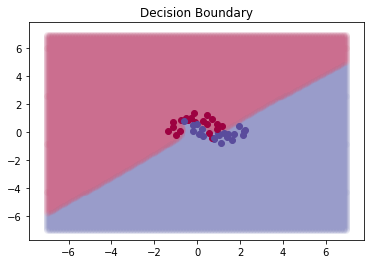

Decision Boundary on Test Data:


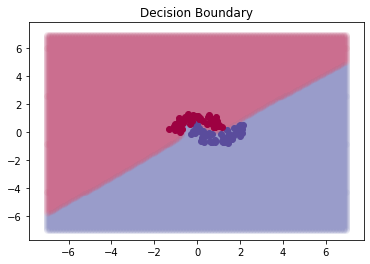

Test Data Accuracy: 0.940000
Train Data Accuracy: 0.951220


In [33]:
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=500)

### Results:

| max iteration | training set accuracy | test set accuracy |
|:-------------:|:---------------------:|:-----------------:|
|      100      |       0.926829        |      0.980000     |
|      500      |       0.951220        |      0.940000     |
|      1000     |       0.951220        |      0.940000     |

Above results show overfitting in model. This overfitting happened becuase of increasing in max iteration number. By increasing max iteration number, Neural Network uses more details of training set and even uses noises as details of features to generate model.

### L2-norm Regularization

L2-norm uses Least Square Errors to minimize values of weights to reduce overfitting. Less value for weights results in less weight value for less important features. L2-norm reduces weights by having a $\lambda \times \sum\limits_{j = 1}^{m} w_j^2$ expression added to error function. $\lambda$ is regularization rate and controlls regularization effect. To minimize error function, values of weights must be minimized. Since we are using performance measure, minus of given expression is added to performance.

Following class show implementation of L2-norm:

In [34]:
class RegularedPerformanceElem(PerformanceElem):
    """
    Representation of a Regulared performance computing output node.
    This element contains methods for setting the
    desired output (d) and also computing the final
    performance P of the network.

    This implementation assumes a single output.
    """

    def __init__(self, input, desired_value):
        assert isinstance(input, (Input, Neuron))
        DifferentiableElement.__init__(self)
        self.my_input = input
        self.my_desired_val = desired_value
        self.weights = []
        self.lamda = 0.0001

    def set_weights(self, _weights):
        self.weights = _weights

    def output(self):
        """
        Returns the output of this PerformanceElem node.

        returns: number (float/int)
        """
        squaredWeights = 0
        for weight in self.weights:
            squaredWeights += weight.get_value() ** 2
        return -0.5 * (self.my_desired_val - self.my_input.output())**2 - self.lamda * squaredWeights

    def dOutdX(self, elem):
        """
        Returns the derivative of this PerformanceElem node with respect
        to some weight, given by elem.

        elem: an instance of Weight

        returns: number (int/float)
        """
        return (self.my_desired_val - self.my_input.output()) * self.my_input.dOutdX(elem) - 2 * self.lamda * elem.get_value()

Following changes are applied to make_neural_net_two_moon to apply new performance element:

In [35]:
def make_neural_net_two_moons():
    """
    Create an overparametrized network with 40 neurons in the first layer
    and a single neuron in the last. This network is more than enough to solve
    the two-moons dataset, and as a result will over-fit the data if trained
    excessively.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    seed_random()

    i0 = Input('i0', -1.0)
    i1 = Input('i1', 0.0)
    i2 = Input('i2', 0.0)
    
    nerun_indexes = ["%02d" % x for x in range(1, 41)]
    
    neurons = []
    wACs = []
    
    for neuron_index in nerun_indexes:
        w1A = Weight("w1A" + neuron_index, random_weight())
        w2A = Weight("w2A" + neuron_index, random_weight())
        wA = Weight("wA" + neuron_index, random_weight())
        neurons.append(Neuron('A' + neuron_index, [i1, i2, i0], [w1A, w2A, wA]))
        wACs.append(Weight('wA' + neuron_index + 'C', random_weight()))
    
    wC = Weight('wC', random_weight())
    C = Neuron('C', neurons + [i0], wACs + [wC])
    
    P = RegularedPerformanceElem(C, 0.0)
    net = Network(P, neurons + [C])
    P.set_weights(net.weights)

    return net

### Analysis Overfitting on Two Moon Network with L2-norm

#### Max Iteration = 100:

----------------------------------------
Training on two-moons data
weights: [w1A01(-0.02), w2A01(-0.19), wA01(0.11), w1A02(0.42), w2A02(-0.34), wA02(0.44), w1A03(-0.39), w2A03(0.44), wA03(0.62), w1A04(0.43), w2A04(-0.50), wA04(0.44), w1A05(-0.47), w2A05(0.23), wA05(0.37), w1A06(0.50), w2A06(0.23), wA06(0.02), w1A07(-0.53), w2A07(0.12), wA07(-0.01), w1A08(-0.39), w2A08(0.44), wA08(0.62), w1A09(0.54), w2A09(-0.82), wA09(0.44), w1A10(0.71), w2A10(-1.00), wA10(0.69), w1A11(-0.52), w2A11(1.16), wA11(0.29), w1A12(0.68), w2A12(-1.37), wA12(0.38), w1A13(0.08), w2A13(0.03), wA13(0.76), w1A14(-0.53), w2A14(0.77), wA14(0.30), w1A15(-0.47), w2A15(0.23), wA15(0.37), w1A16(-2.96), w2A16(-1.31), wA16(1.71), w1A17(-0.66), w2A17(-0.46), wA17(0.68), w1A18(-0.33), w2A18(-1.26), wA18(-0.35), w1A19(0.74), w2A19(-1.37), wA19(0.53), w1A20(0.42), w2A20(0.03), wA20(0.00), w1A21(0.42), w2A21(0.03), wA21(0.00), w1A22(0.26), w2A22(0.48), wA22(0.57), w1A23(-0.53), w2A23(0.77), wA23(0.30), w1A24(0.43), w2A24(-0.50

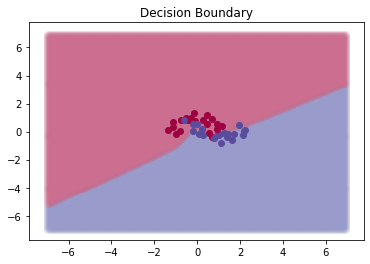

Decision Boundary on Test Data:


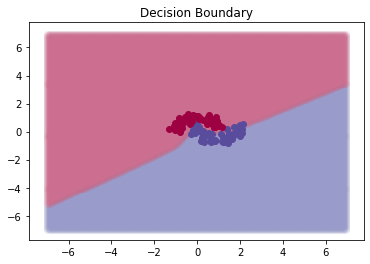

Test Data Accuracy: 0.920000
Train Data Accuracy: 0.829268


In [36]:
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=100)

#### Max Iteration = 500:

----------------------------------------
Training on two-moons data
weights: [w1A01(-0.45), w2A01(0.18), wA01(0.46), w1A02(0.27), w2A02(-0.49), wA02(0.49), w1A03(-0.62), w2A03(0.76), wA03(0.37), w1A04(0.33), w2A04(-0.56), wA04(0.48), w1A05(-0.61), w2A05(0.63), wA05(0.38), w1A06(-0.24), w2A06(-0.04), wA06(0.50), w1A07(-0.61), w2A07(0.61), wA07(0.38), w1A08(-0.62), w2A08(0.76), wA08(0.37), w1A09(0.50), w2A09(-0.77), wA09(0.47), w1A10(0.53), w2A10(-0.82), wA10(0.47), w1A11(-0.63), w2A11(0.94), wA11(0.37), w1A12(0.56), w2A12(-0.87), wA12(0.47), w1A13(-0.42), w2A13(0.16), wA13(0.48), w1A14(-0.63), w2A14(0.86), wA14(0.36), w1A15(-0.61), w2A15(0.63), wA15(0.38), w1A16(-1.99), w2A16(-2.11), wA16(1.09), w1A17(-0.58), w2A17(0.43), wA17(0.41), w1A18(0.41), w2A18(-0.68), wA18(0.45), w1A19(0.56), w2A19(-0.88), wA19(0.47), w1A20(-0.02), w2A20(-0.24), wA20(0.50), w1A21(-0.02), w2A21(-0.24), wA21(0.50), w1A22(-0.58), w2A22(0.54), wA22(0.41), w1A23(-0.63), w2A23(0.86), wA23(0.36), w1A24(0.33), w2A24(-0

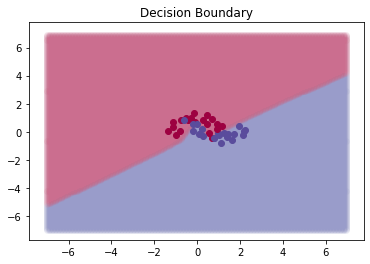

Decision Boundary on Test Data:


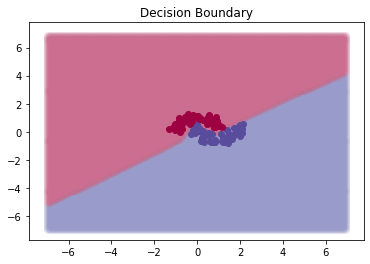

Test Data Accuracy: 0.970000
Train Data Accuracy: 0.926829


In [37]:
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=500)

#### Max Iteration = 1000;

----------------------------------------
Training on two-moons data
weights: [w1A01(-0.56), w2A01(0.52), wA01(0.41), w1A02(0.34), w2A02(-0.61), wA02(0.46), w1A03(-0.59), w2A03(0.78), wA03(0.39), w1A04(0.40), w2A04(-0.68), wA04(0.45), w1A05(-0.59), w2A05(0.74), wA05(0.39), w1A06(-0.51), w2A06(0.32), wA06(0.45), w1A07(-0.59), w2A07(0.74), wA07(0.39), w1A08(-0.59), w2A08(0.78), wA08(0.39), w1A09(0.48), w2A09(-0.79), wA09(0.44), w1A10(0.49), w2A10(-0.80), wA10(0.44), w1A11(-0.59), w2A11(0.83), wA11(0.39), w1A12(0.49), w2A12(-0.82), wA12(0.44), w1A13(-0.56), w2A13(0.50), wA13(0.41), w1A14(-0.59), w2A14(0.81), wA14(0.39), w1A15(-0.59), w2A15(0.74), wA15(0.39), w1A16(-1.97), w2A16(-2.26), wA16(1.05), w1A17(-0.58), w2A17(0.67), wA17(0.39), w1A18(0.45), w2A18(-0.75), wA18(0.44), w1A19(0.49), w2A19(-0.82), wA19(0.44), w1A20(-0.29), w2A20(-0.01), wA20(0.49), w1A21(-0.29), w2A21(-0.01), wA21(0.49), w1A22(-0.59), w2A22(0.71), wA22(0.39), w1A23(-0.59), w2A23(0.81), wA23(0.39), w1A24(0.40), w2A24(-0.

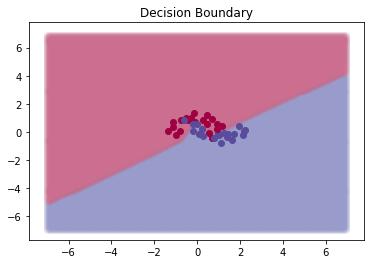

Decision Boundary on Test Data:


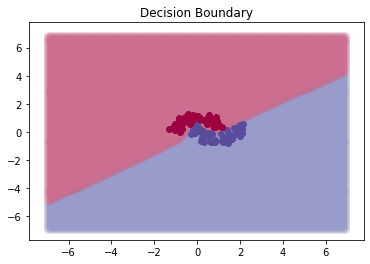

Test Data Accuracy: 0.970000
Train Data Accuracy: 0.951220


In [38]:
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=1000)

### Results

| max iteration | training set accuracy | test set accuracy |
|:-------------:|:---------------------:|:-----------------:|
|      100      |       0.829268        |      0.920000     |
|      500      |       0.926829        |      0.970000     |
|      1000     |       0.951220        |      0.970000     |

As you can see, L2-norm helped to reduce overfitting by reducing values of weights. The numbers show less dependency on specific features  on training set and less train data accuracy on overfitted models and not losing accuracy on increasing max iteration.